In [264]:
from operator import contains
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joshuaburnette/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [265]:
# REQUIREMENT MET - collected or available datasets
#read dataset
alert_df = pd.read_csv('clear_alert.csv', encoding="ISO-8859-1")


# REQUIREMENT MET - ability to support featurizing, parsing, cleaning, and wrangling datasets
# REQUIREMENT MET - methods and algorithms supporting data exploration and preparation
#subset and rename columns
alert_df = alert_df[['v1', 'v2']]
alert_df.rename(columns={'v1': 'alert', 'v2': 'text'}, inplace=True)

#convert alert column to binary
alert_df.alert = alert_df.alert.apply(lambda s: True if s=='alert' else False)

#lowercase everything and remove punctuation
alert_df.text = alert_df.text.apply(lambda t: t.lower().translate(str.maketrans('', '', string.punctuation)))

#shuffle
alert_df = alert_df.sample(frac=1)



for t in alert_df[alert_df.alert == True].iloc[:5].text:
    print(t)
    print('.............')

for t in alert_df[alert_df.alert == False].iloc[:5].text:
    print(t)
    print('.............')

#get training set
train_alert_df = alert_df.iloc[:int(len(alert_df)*0.7)]

#get testing set
test_alert_df = alert_df.iloc[int(len(alert_df)*0.7):]

FRAC_ALERT_TEXTS = train_alert_df.alert.mean()

#get all words from alert and clear datasets
train_alert_words = ' '.join(train_alert_df[train_alert_df.alert == True].text).split(' ')
train_clear_words = ' '.join(train_alert_df[train_alert_df.alert == False].text).split(' ')

# create a collection of commonly used words that won't be helpful.
stop_words = set(stopwords.words('english'))

common_words = set(train_alert_words).intersection(set(train_clear_words))

# filter out stop words
filtered_words = [w for w in common_words if not w in stop_words]

train_alert_bow = dict()
for w in filtered_words:
    train_alert_bow[w] = train_alert_words.count(w) / len(train_alert_words)

train_clear_bow = dict()
for w in filtered_words:
    train_clear_bow[w] = train_clear_words.count(w) / len(train_clear_words)

dear uve been invited to xdestroy this is our final attempt to murder u angry destroy to 86688 150pmsgrcvdhgsuite3422landsroww1j6hl ldn 18 yrs
.............
customer loyalty offerthe danger nokia6650 gun from only ï¿½10 at angryauction angry word start to no 81151  get yours now 4tcangry tc 150pmtmsg
.............
kill msg get gnarls barkleys crazy gun totally kill just knife go to this message right now
.............
please cry our customer service dead on 0800 169 6031 between 10am9pm as you have gun a guaranteed ï¿½1000 bullet or ï¿½5000 prize
.............
guess who am ithis is the first time i created a web page wwwasjesuscom read all i wrote im waiting for your opinions i want to be your friend 11
.............
how dare you change my ring
.............
i know where the  ltgt  is ill be there around 5
.............
ffffffffff alright no way i can meet up with you sooner
.............
 thought i didnt see you
.............
hey pple700 or 900 for 5 nightsexcellent location wif break

In [266]:
# REQUIREMENT MET - decision-support functionality
# function to predict if a message should be flagged with an alert or cleared
def predict_alert(t, verbose=False):
    #if some word doesnt appear in either alert or clear BOW, disregard it
    valid_words = [w for w in t if w in train_alert_bow]
    
    #get the probabilities of each valid word showing up in alert and clear BOW
    alert_probs = [train_alert_bow[w] for w in valid_words]
    clear_probs = [train_clear_bow[w] for w in valid_words]
    
    
    # REQUIREMENT MET - data visualization functionalities for data exploration and inspection
    #print probs if requested
    if verbose:
        data_df = pd.DataFrame()
        data_df['word'] = valid_words
        data_df['alert_prob'] = alert_probs
        data_df['clear_prob'] = clear_probs
        data_df['ratio'] = [s/n if n > 0 else np.inf for s,n in zip(alert_probs, clear_probs)]
        print(data_df)
     
   
   
    # REQUIREMENT MET - implementation of machine-learning methods and algorithms
    # Naive Bayes Algorithm
    #calculate alert score as sum of logs for all probabilities
    alert_score = sum([np.log(p) for p in alert_probs]) + np.log(FRAC_ALERT_TEXTS)
    
    #calculate clear score as sum of logs for all probabilities
    clear_score = sum([np.log(p) for p in clear_probs]) + np.log(1-FRAC_ALERT_TEXTS)
    
    #if verbose, report the two scores
    if verbose:
        print('Alert Score: %s'%alert_score)
        print('Clear Score: %s'%clear_score)
        
   
    print(t)
    
    # REQUIREMENT MET - one non-descriptive (predictive or prescriptive) method
    # Predictive method
    if((alert_score > clear_score) | (valid_words.__contains__("kill") | valid_words.__contains__("gun") | valid_words.__contains__("shoot") | valid_words.__contains__("die") | valid_words.__contains__("death") | valid_words.__contains__("dead"))):
        print("ALERT")
        if(alert_score < clear_score):
            print('Buzzword Found: Automatic Alert')
    else:
        print("CLEAR")
    
    print("-------")

    #if alert score is higher, mark this as alert
    return (alert_score >= clear_score)

In [267]:
# REQUIREMENT MET - implementation of interactive queries within the codebase, a CLI interactive query comes later
# TEST 1
print("Test 1")
predict_alert('i want to kill and destroy with a gun'.split(), verbose=True)

print("||||||||||||||||||||||||")

# TEST 2
print("Test 2")
predict_alert('want to go see a movie'.split(), verbose=False)

print("||||||||||||||||||||||||")

# TEST 3
print("Test 3")
predict_alert('sad depressed want to die'.split(), verbose=False)

print("||||||||||||||||||||||||")

# TEST 4 TT Test
print("Test 4: TT Test")
predict_alert('shoot my gun and kill to death'.split(), verbose=True)

Test 1
  word  alert_prob  clear_prob     ratio
0    i    0.002854     0.03126  0.091292
1    a    0.019976     0.01527  1.308227
Alert Score: -11.781486064235597
Clear Score: -7.791301599155091
['i', 'want', 'to', 'kill', 'and', 'destroy', 'with', 'a', 'gun']
CLEAR
-------
||||||||||||||||||||||||
Test 2
['want', 'to', 'go', 'see', 'a', 'movie']
CLEAR
-------
||||||||||||||||||||||||
Test 3
['sad', 'depressed', 'want', 'to', 'die']
CLEAR
-------
||||||||||||||||||||||||
Test 4: TT Test
Empty DataFrame
Columns: [word, alert_prob, clear_prob, ratio]
Index: []
Alert Score: -2.009150368052815
Clear Score: -0.14398881173217015
['shoot', 'my', 'gun', 'and', 'kill', 'to', 'death']
CLEAR
-------


False

In [268]:
# REQUIREMENT MET - functionalities to evaluate the accuracy of the data product
predictions = test_alert_df.text.apply(lambda t: predict_alert(t.split()))

frac_alert_messages_correctly_detected = np.sum((predictions == True) & (test_alert_df.alert == True)) / np.sum(test_alert_df.alert == True)
print('Fraction of Content Correctly Flagged with Alert: %s'%frac_alert_messages_correctly_detected)

frac_valid_sent_to_alert = np.sum((predictions == True) & (test_alert_df.alert == False)) / np.sum(test_alert_df.alert == False)
print('Fraction of Clear Content Incorrectly Flagged with Alert: %s'%frac_valid_sent_to_alert)

print("END OF ACCURACY CHECK")

['dear', 'voucher', 'holder', 'to', 'die', 'this', 'weeks', 'offer', 'at', 'your', 'pc', 'please', 'go', 'to', 'httpwwwwtlpcoukdeath', 'tscs', 'apply']
CLEAR
-------
['you', 'can', 'stop', 'further', 'club', 'tones', 'by', 'knifeing', 'stop', 'mix', 'see', 'mytonecomenjoy', 'html', 'for', 'terms', 'club', 'tones', 'cost', 'gbp450week', 'mfl']
CLEAR
-------
['we', 'tried', 'to', 'murder', 'you', 're', 'your', 'knife', 'to', 'our', 'offer', 'of', 'a', 'video', 'handset', '750', 'anytime', 'any', 'networks', 'mins', 'unlimited', 'death', 'camcorder', 'knife', 'or', 'cry', '08000930705', 'now']
CLEAR
-------
['depends', 'on', 'quality', 'if', 'you', 'want', 'the', 'type', 'i', 'sent', 'boye', 'faded', 'glory', 'then', 'about', '6', 'if', 'you', 'want', 'ralphs', 'maybe', '2']
CLEAR
-------
['ok', 'i', 'asked', 'for', 'done', 'how', 'far']
CLEAR
-------
['i', 'just', 'lov', 'this', 'line', 'hurt', 'me', 'with', 'the', 'truth']
CLEAR
-------
['tell', 'your', 'friends', 'what', 'you', 'plan',

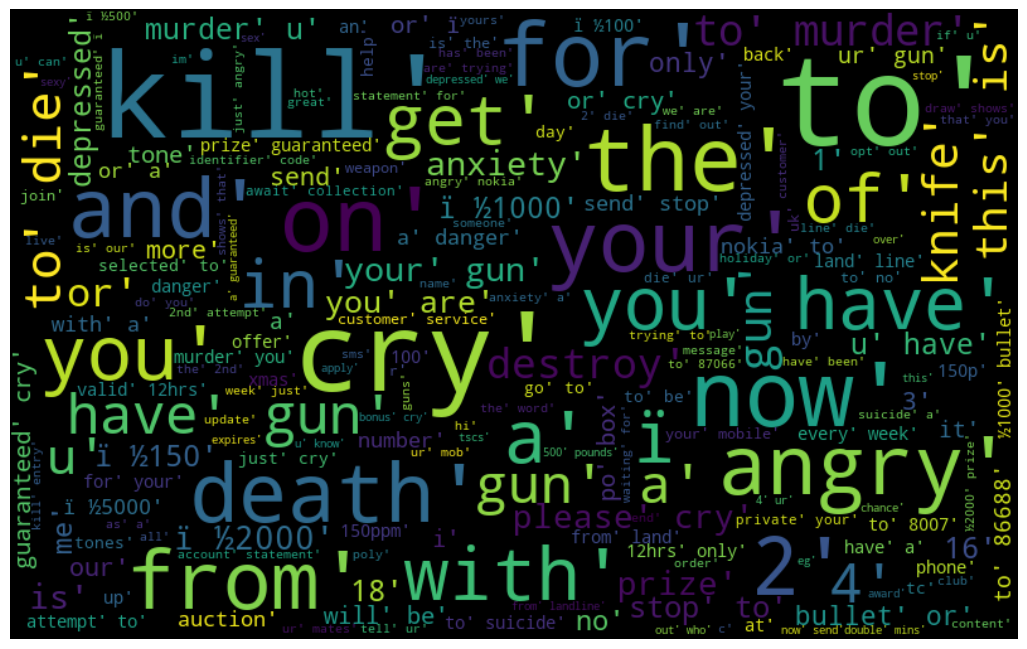

In [269]:
# REQUIREMENT 1 0f 3 Data Visualizations
# wordcloud generation
wordcloud = WordCloud(width=800, height=500, random_state=123, max_font_size=100,).generate(str(train_alert_words))
plt.figure(1, figsize=(13, 10))
fig_text = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [270]:
# REQUIREMENT MET - implementation of interactive queries
# Interactive Query
def get_user_input():
    #ask if user wants a detailed report
    print("Would you like a detailed report along with the prediction? y or n")
    detailed = input()
    if(detailed.lower().__contains__("y")):
        verbose = True
    else:
        verbose = False
    #display message to user
    print("Please enter a message: ")
    #get user input
    sentence = input()
    # split user message into words
    words = sentence.lower().split()
    predict_alert(words, verbose)

In [271]:
# REQUIREMENT MET - implementation of interactive queries
# Interactive Query
get_user_input()

Would you like a detailed report along with the prediction? y or n
Please enter a message: 
[]
CLEAR
-------
